In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('emails.csv')

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [13]:
# Kiểm tra thông tin dữ liệu và kiểm tra giá trị null
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [9]:
# Thống kê mô tả để hiểu về phân phối của dữ liệu
print(df.describe())

               the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  ...  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  ...   
mean      2.627030    55.517401     2.466551     2.024362    10.600155  ...   
std       6.229845    87.574172     4.314444     6.967878    19.281892  ...   
min       0.00000

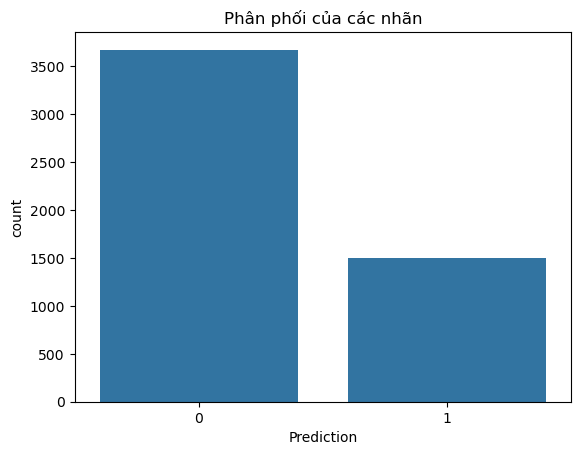

In [11]:
# Kiểm tra phân phối của các nhãn (labels) trong dữ liệu
sns.countplot(x='Prediction', data=df)
plt.title('Phân phối của các nhãn')
plt.show()

In [17]:
input_X = df.drop(columns=['Prediction', 'Email No.'])
input_Y = df.Prediction

In [19]:
input_X.head(1)

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
input_Y.head(1)

0    0
Name: Prediction, dtype: int64

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(input_X)

In [27]:
# Giảm chiều dữ liệu bằng PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_reduced = pca.fit_transform(X)

In [29]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_reduced, X_test_reduced, Y_train, Y_test = train_test_split(X_reduced, input_Y, test_size=0.3, random_state=42)

In [35]:
# Huấn luyện mô hình RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10)
rf_model.fit(X_train_reduced, Y_train)
y_pred_rf = rf_model.predict(X_test_reduced)

In [41]:
# Đánh giá mô hình
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test, y_pred_rf)
recall_rf = recall_score(Y_test, y_pred_rf)
f1_rf = f1_score(Y_test, y_pred_rf)

In [43]:
# Kết quả
accuracy_rf, precision_rf, recall_rf, f1_rf

(0.9536082474226805,
 0.9172113289760349,
 0.9252747252747253,
 0.9212253829321663,
 0.9677835051546392,
 0.9490022172949002,
 0.9406593406593406,
 0.9448123620309051,
 0.9561855670103093,
 0.9125799573560768,
 0.9406593406593406,
 0.9264069264069265)

In [45]:
# Cải thiện mô hình Random Forest với các tham số khác nhau 300, 400, 500
# Thử nghiệm với số lượng cây tăng lên và điều chỉnh độ sâu
rf_model_tuned = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)
rf_model_tuned.fit(X_train_reduced, Y_train)

RandomForestClassifier(max_depth=15, n_estimators=500, random_state=42)

In [46]:
# Dự đoán với tập kiểm tra
y_pred_rf_tuned = rf_model_tuned.predict(X_test_reduced)

In [47]:
# Đánh giá mô hình Random Forest đã được cải thiện
accuracy_rf_tuned = accuracy_score(Y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(Y_test, y_pred_rf_tuned)
recall_rf_tuned = recall_score(Y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(Y_test, y_pred_rf_tuned)

In [48]:
# Kết quả sau khi cải thiện
accuracy_rf_tuned, precision_rf_tuned, recall_rf_tuned, f1_rf_tuned

(0.9697164948453608, 0.9513274336283186, 0.945054945054945, 0.948180815876516)

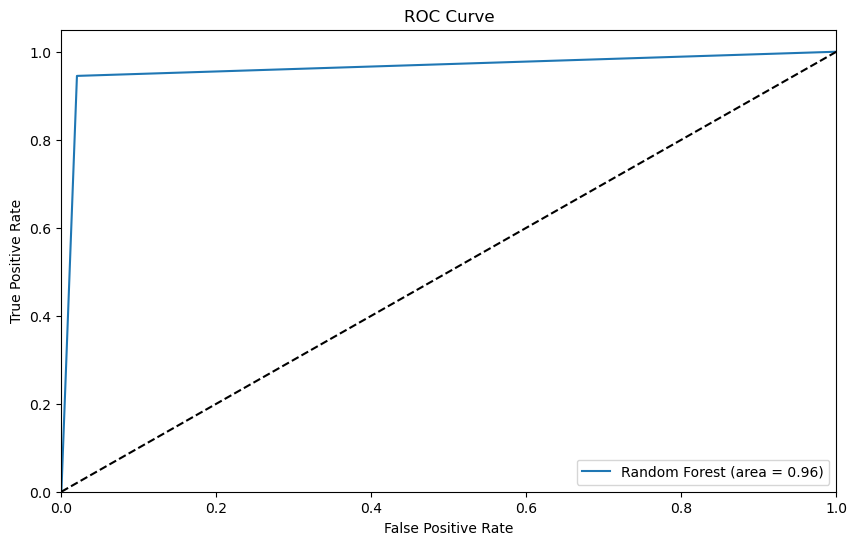

In [87]:
# Tính toán và vẽ ROC-AUC 
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_rf = roc_auc_score(Y_test, y_pred_rf_tuned)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf_tuned)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()